In [11]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgboost_model.json')


In [12]:
csv_file_path = 'healthinsurance2.csv'  # Replace with the actual path to your CSV file
# Read the CSV file

mydata = pd.read_csv(csv_file_path)

mydata = mydata.dropna()
le = LabelEncoder()
mydata['city'] = le.fit_transform(mydata['city'])
X = mydata.drop(columns=['claim', 'city'])
y = mydata['claim']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\luukd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\luukd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\luukd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\luukd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\luukd\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

<Figure size 640x480 with 0 Axes>

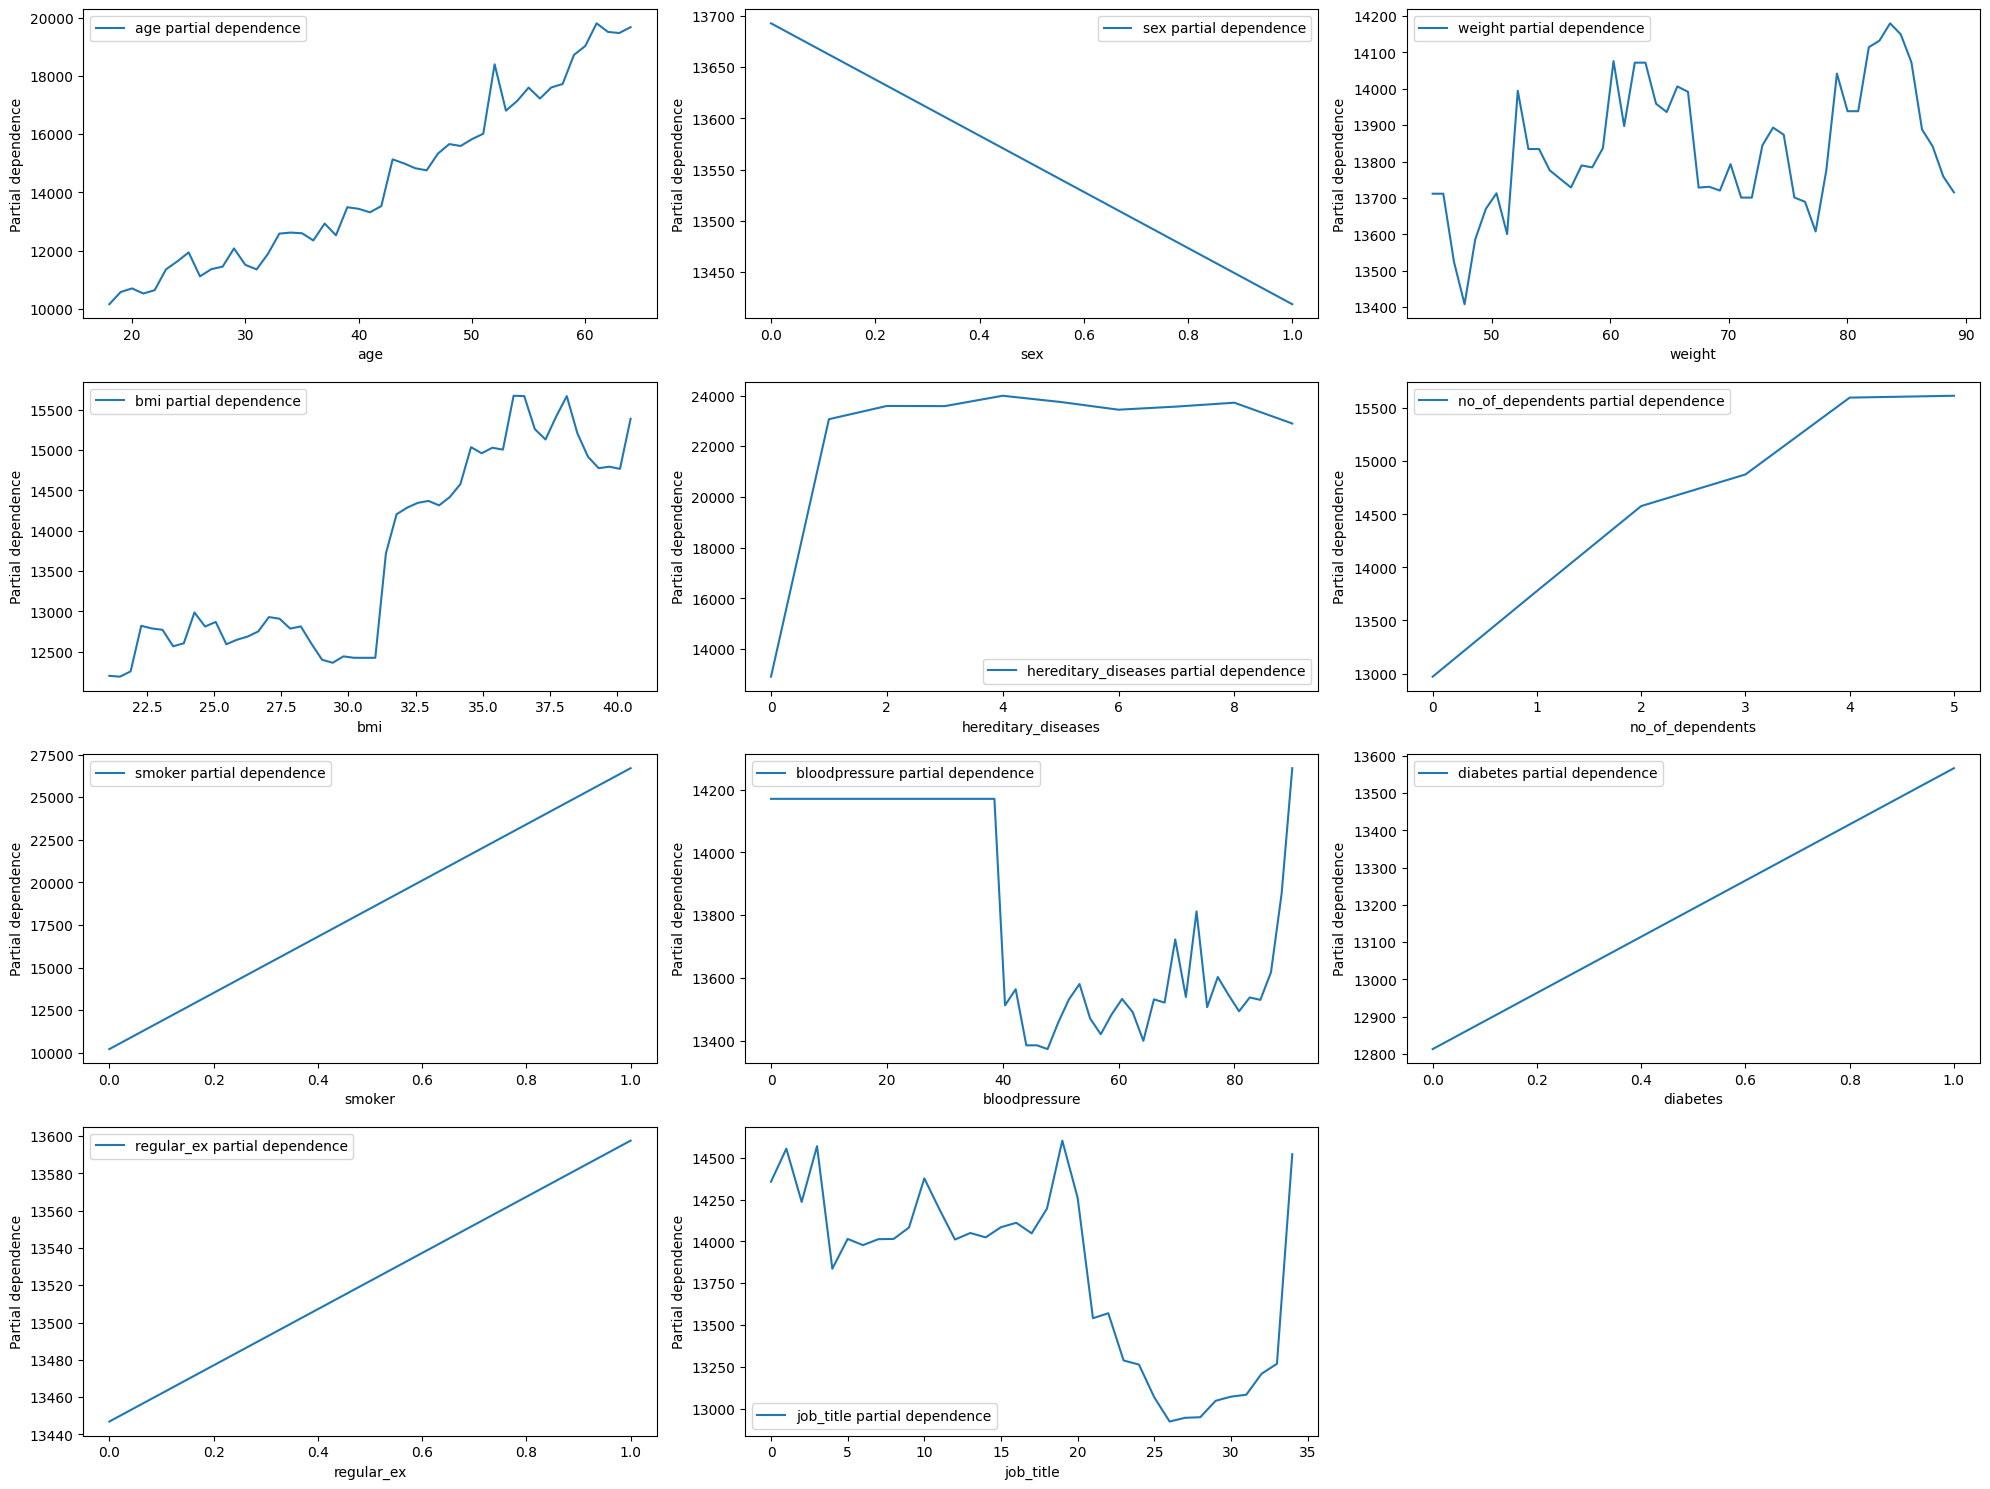

In [37]:
features = list(range(X_train_scaled.shape[1]))
pdp_results = PartialDependenceDisplay.from_estimator(loaded_model, X_train_scaled, features, feature_names=X.columns, grid_resolution=50)
plt.clf()

# Determine the number of columns and rows for subplots
num_features = len(features)
num_cols = 3 # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots with adjusted dimensions
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Ensure ax is always a list of Axes
if num_features == 1:
    ax = [ax]  # Convert to a list if there's only one feature

# Flatten the axes array for easy indexing
ax = ax.flatten()

# Iterate over each feature and its corresponding pd_result
for i, (pd_result, feature_name) in enumerate(zip(pdp_results.pd_results, X.columns)):
    ax_row = ax[i]  # Select subplot
    
    # Iterate over values and pd (partial dependence) in pd_result
    for values, pd in zip(pd_result['values'], pd_result['average']):
        # Rescale the X values back to the original scale
        original_values = scaler.inverse_transform(
            np.column_stack([values if j == i else np.zeros_like(values) for j in range(len(features))])
        )[:, i]
        
        # Plot the partial dependence
        ax_row.plot(original_values, pd, label=f'{feature_name} partial dependence')
    
    # Set labels, title, and legend for each subplot
    ax_row.set_xlabel(feature_name)
    ax_row.set_ylabel('Partial dependence')
    ax_row.legend()

# Remove any unused subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

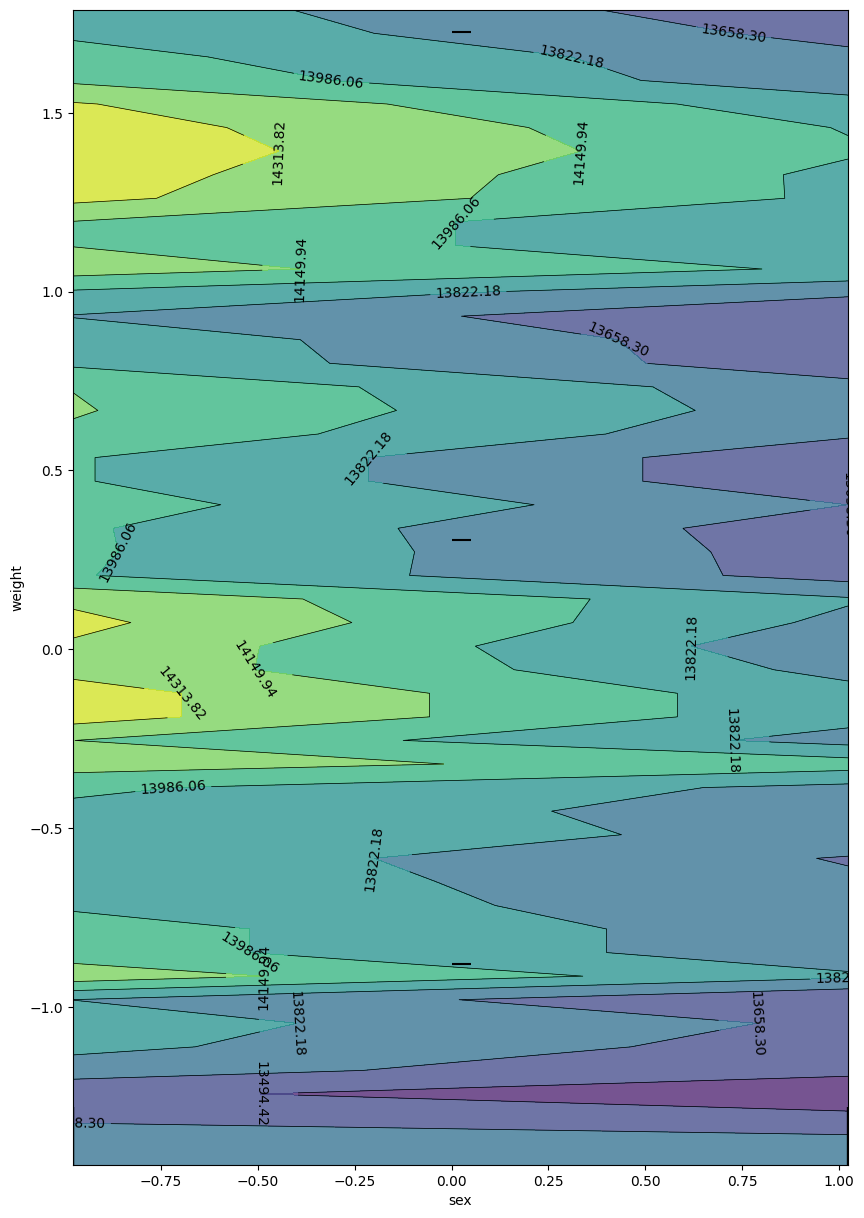

In [ ]:
features = [(1,2)]
fig, ax = plt.subplots(figsize=(10, 15))
PartialDependenceDisplay.from_estimator(loaded_model, X_train_scaled, features, feature_names=X.columns, grid_resolution=50, ax=ax)